## Problem 3: How many people live in the dominance area of each shopping center? 

Find out how many people live under the dominance area of each shopping center. You should be able to do this based on the output from problem 2, lesson materials from weeks 2, 3 and 4 and these additional hints:

- You can read in the population data from the HSY WFS service: https://kartta.hsy.fi/geoserver/wfs (check more hints from the lesson materials)
- Aggregate your dominance areas from problem 2 into a unified geometries using [`dissolve()`](http://geopandas.org/aggregation_with_dissolve.html#dissolve-example) -function in geopandas before joining with the population data.
- Remember to check the crs of the input data.
- Join information between the population grid and the dominance areas -layer using `intersect` as the condition in the spatial join.

You can freely organize your code into the code cells below.



In [3]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
import geojson
import numpy as np
import pandas as pd
import geopandas as gpd
from pyproj import CRS
import requests
import matplotlib.pyplot as plt

In [4]:
# Specify the url for web feature service
url = 'https://kartta.hsy.fi/geoserver/wfs'

# Specify parameters (read data in json format). 
# Available feature types in this particular data source: http://geo.stat.fi/geoserver/vaestoruutu/wfs?service=wfs&version=2.0.0&request=describeFeatureType
params = dict(service='WFS', 
              version='2.0.0', 
              request='GetFeature', 
              typeName='asuminen_ja_maankaytto:Vaestotietoruudukko_2018', 
              outputFormat='json')

# Fetch data from WFS using requests
r = requests.get(url, params=params)

# Create GeoDataFrame from geojson
pop = gpd.GeoDataFrame.from_features(geojson.loads(r.content))

In [6]:
pop_new = pop[['geometry', 'asukkaita']].rename(columns={'asukkaita': 'pop18'})
pop_new.head()

,geometry,pop18
0,"POLYGON ((25472499.995 6689749.005, 25472499.9...",9
1,"POLYGON ((25472499.995 6685998.998, 25472499.9...",5
2,"POLYGON ((25472499.995 6684249.004, 25472499.9...",8
3,"POLYGON ((25472499.995 6683999.005, 25472499.9...",5
4,"POLYGON ((25472499.995 6682998.998, 25472499.9...",11


In [8]:
# read grid data from previous problem set
grid = gpd.read_file('data/dominant_closest_shopping_centers.shp')

In [13]:
pop_new = pop_new.set_crs(grid.crs)
pop_new.crs == grid.crs

True

In [14]:
grid_dissolved = grid.dissolve(by='min_t')

<AxesSubplot:>

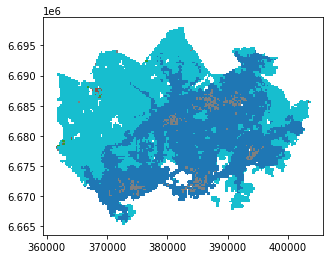

In [21]:
grid_dissolved.plot(column='dominant_s')

In [24]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
final_grid = gpd.sjoin(grid_dissolved, pop_new, how='inner', op='intersects')

In [25]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
final_grid.head()

,geometry,x,y,YKR_ID,pt_r_t_Jum,pt_r_t_Dix,pt_r_t_Myy,pt_r_t_Iti,pt_r_t_For,pt_r_t_Iso,pt_r_t_Ruo,dominant_s,index_right,pop18
min_t,,,,,,,,,,,,,,


In [ ]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

Remember to print the answers in this notebook :)

### Extra bonus task

Repeat problem 2 and 3 for car accessibility! No extra points available for this, but you can for example start thinking if you want to make the final assignment related to this topic :)